In [6]:

import pandas as pd
ind = pd.read_csv("ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [7]:
import edhec_risk_kit as erk

In [8]:
ind = erk.get_ind_returns()
ind.shape

(1110, 30)

In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
# er = expected_return

er = erk.annualize_rets(ind["1996":"2000"],12)
# cov = covariance matrix
cov = ind["1996":"2000"].cov()

In [54]:
def portfolio_return(weights, returns):
    """
    Weights-> Returns
    """
    return weights.T @ returns

# covmat = covariance matrix
def portfolio_vol(weights, covmat):
    """
    Weights-> Vol
    """
    return (weights.T @ covmat @ weights)**0.5

In [56]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [13]:
#loc gives you,.iloc gives you the index location by integers, 
#whereas I'm looking at the index location by this index. 
#I'm going to index it by the column index here.

#first l = row index, second l = column index in our covarience matrix
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [17]:
import numpy as np
weights = np.repeat(1/4,4)
weights


array([0.25, 0.25, 0.25, 0.25])

In [18]:
erk.portfolio_return(weights,expected_return[l])

0.19511097196038385

In [19]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

In [27]:
## 2 Asset Frontier

l = ["Games", "Fin"]

In [28]:
n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [29]:
#how many points
len(weights)

20

In [30]:
l

['Games', 'Fin']

In [33]:
rets = [erk.portfolio_return(w,expected_return[l]) for w in weights]
vols = [erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]

#efficient frontier
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef

,R,Vol
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753
5,0.182540,0.057965
6,0.174374,0.057308
7,0.166207,0.056786
8,0.158041,0.056403
9,0.149875,0.056161


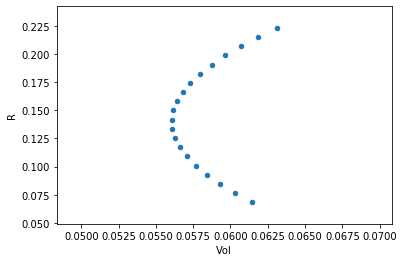

In [34]:
import pandas as pd
ef.plot.scatter(x="Vol", y="R")

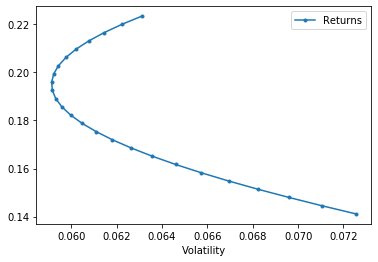

In [66]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l],cov.loc[l,l], ".-")

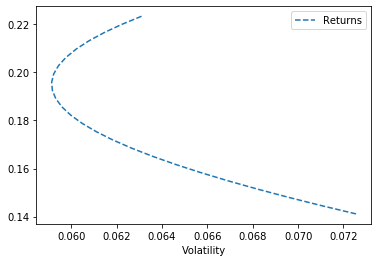

In [67]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l],cov.loc[l,l], style="--")